<a href="https://colab.research.google.com/github/svetlanama/orthopedic/blob/main/orthopedic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: Pandas, NumPy & Visualization
## Part 2: Data Analysis with Orthopedic Dataset

**Total Points: 6**

In [1]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

---
## Part 2: Data Analysis with Orthopedic Dataset (6 points)

### Load the Dataset

In [9]:
print("=" * 50)
print("QUESTION 1: Data Exploration & Filtering")
print("=" * 50)

uploaded = files.upload()

# Load data
patients = pd.read_csv('column_3C_weka.csv')

QUESTION 1: Data Exploration & Filtering


Saving column_3C_weka.csv to column_3C_weka.csv


---
### Question 1: Pandas - Data Exploration & Filtering (1 point)

**Task:** Explore the dataset and filter patients with severe conditions.

In [10]:
# ==================== QUESTION 1 ====================
print("=" * 50)
print("QUESTION 1: Data Exploration & Filtering")
print("=" * 50)

# Part A (0.4 pts): Load and explore data
print("\n--- Part A: Data Exploration ---")

# Display first 5 rows
print("\nFirst 5 patients:")
print(patients.head())

# Dataset shape
print(f"\nDataset shape: {patients.shape[0]} rows, {patients.shape[1]} columns")

# Column names and data types
print(f"\nColumns: {list(patients.columns)}")
print("\nData types:")
print(patients.dtypes)

QUESTION 1: Data Exploration & Filtering

--- Part A: Data Exploration ---

First 5 patients:
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  

Dataset shape: 310 rows, 7 columns

Columns: ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_s

In [11]:
# Part B (0.6 pts): Filter severe cases
print("\n--- Part B: Filter Severe Cases ---")

# Find patients with SEVERE biomechanical abnormalities:
# - degree_spondylolisthesis > 30 OR
# - pelvic_incidence > 70
severe_cases = patients[
    (patients['degree_spondylolisthesis'] > 30) |
    (patients['pelvic_incidence'] > 70)
]

print(f"\nSevere cases found: {len(severe_cases)}")
print(f"Percentage of total: {(len(severe_cases) / len(patients) * 100):.1f}%")

print("\nClass distribution of severe cases:")
print(severe_cases['class'].value_counts())


--- Part B: Filter Severe Cases ---

Severe cases found: 136
Percentage of total: 43.9%

Class distribution of severe cases:
class
Spondylolisthesis    128
Normal                 7
Hernia                 1
Name: count, dtype: int64


---
### Question 2: Pandas - Group Analysis (1 point)

**Task:** Compare biomechanical features across the three diagnosis groups.

In [12]:
# ==================== QUESTION 2 ====================
print("=" * 50)
print("QUESTION 2: Group Analysis")
print("=" * 50)

# Part a (0.7 pts): Group statistics for each diagnosis class
print("\n--- Part A: Statistics by Diagnosis ---")

diagnosis_stats = patients.groupby('class').agg({
    'degree_spondylolisthesis': 'mean',
    'pelvic_incidence': 'mean',
    'lumbar_lordosis_angle': 'std'
})

# Add patient count
diagnosis_stats['patient_count'] = patients.groupby('class').size()

# Rename columns for clarity
diagnosis_stats.columns = [
    'mean_spondylolisthesis',
    'mean_pelvic_incidence',
    'std_lumbar_lordosis',
    'patient_count'
]

print("\nStatistics by Diagnosis:")
print(diagnosis_stats.round(2))

QUESTION 2: Group Analysis

--- Part A: Statistics by Diagnosis ---

Statistics by Diagnosis:
                   mean_spondylolisthesis  mean_pelvic_incidence  \
class                                                              
Hernia                               2.48                  47.64   
Normal                               2.19                  51.69   
Spondylolisthesis                   51.90                  71.51   

                   std_lumbar_lordosis  patient_count  
class                                                  
Hernia                            9.77             60  
Normal                           12.36            100  
Spondylolisthesis                16.40            150  


In [13]:
# Part b (0.3 pts): Which diagnosis has highest average spondylolisthesis?
print("\n--- Part B: Highest Spondylolisthesis ---")

highest_diagnosis = diagnosis_stats['mean_spondylolisthesis'].idxmax()
highest_value = diagnosis_stats['mean_spondylolisthesis'].max()

print(f"\nDiagnosis with highest spondylolisthesis: {highest_diagnosis}")
print(f"Average value: {highest_value:.2f}")


--- Part B: Highest Spondylolisthesis ---

Diagnosis with highest spondylolisthesis: Spondylolisthesis
Average value: 51.90


---
### Question 3: NumPy - Statistical Analysis (1 point)

**Task:** Use NumPy to perform numerical calculations on biomechanical features.

In [14]:
# ==================== QUESTION 3 ====================
print("=" * 50)
print("QUESTION 3: NumPy Statistical Analysis")
print("=" * 50)

# Part a (0.5 pts): NumPy statistics on pelvic_incidence
print("\n--- Part A: Pelvic Incidence Statistics ---")

# Convert to NumPy array
pelvic_incidence_array = patients['pelvic_incidence'].to_numpy()

# Calculate statistics using NumPy
mean_pi = np.mean(pelvic_incidence_array)
median_pi = np.median(pelvic_incidence_array)
std_pi = np.std(pelvic_incidence_array)
p25 = np.percentile(pelvic_incidence_array, 25)
p75 = np.percentile(pelvic_incidence_array, 75)

print("\nPelvic Incidence Statistics:")
print(f"Mean: {mean_pi:.2f}")
print(f"Median: {median_pi:.2f}")
print(f"Std Dev: {std_pi:.2f}")
print(f"25th percentile: {p25:.2f}")
print(f"75th percentile: {p75:.2f}")

QUESTION 3: NumPy Statistical Analysis

--- Part A: Pelvic Incidence Statistics ---

Pelvic Incidence Statistics:
Mean: 60.50
Median: 58.69
Std Dev: 17.21
25th percentile: 46.43
75th percentile: 72.88


In [15]:
# Part b (0.5 pts): Z-score normalization
print("\n--- Part B: Z-Score Normalization ---")

# Convert degree_spondylolisthesis to NumPy array
spondylo_array = patients['degree_spondylolisthesis'].to_numpy()

# Calculate z-scores using vectorized NumPy operations (no loops!)
spondylo_mean = np.mean(spondylo_array)
spondylo_std = np.std(spondylo_array)
spondylo_zscore = (spondylo_array - spondylo_mean) / spondylo_std

# Add standardized values as new column
patients['spondylo_zscore'] = spondylo_zscore

# Count outliers (|z-score| > 2)
outliers = np.abs(spondylo_zscore) > 2
num_outliers = np.sum(outliers)

print(f"\nZ-score statistics:")
print(f"Mean of original: {spondylo_mean:.2f}")
print(f"Std of original: {spondylo_std:.2f}")
print(f"Mean of z-scores: {np.mean(spondylo_zscore):.6f} (should be ~0)")
print(f"Std of z-scores: {np.std(spondylo_zscore):.6f} (should be ~1)")

print(f"\nNumber of outliers (|z-score| > 2): {num_outliers}")
print(f"Percentage of outliers: {(num_outliers / len(patients) * 100):.1f}%")


--- Part B: Z-Score Normalization ---

Z-score statistics:
Mean of original: 26.30
Std of original: 37.50
Mean of z-scores: 0.000000 (should be ~0)
Std of z-scores: 1.000000 (should be ~1)

Number of outliers (|z-score| > 2): 9
Percentage of outliers: 2.9%


---
### Question 4: Matplotlib - Visualization (1.5 points)

**Task:** Create visualizations to understand the data better.

QUESTION 4: Matplotlib Visualization


/tmp/ipython-input-702903214.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(diagnosis_groups,



Figure saved as 'orthopedic_analysis.png'


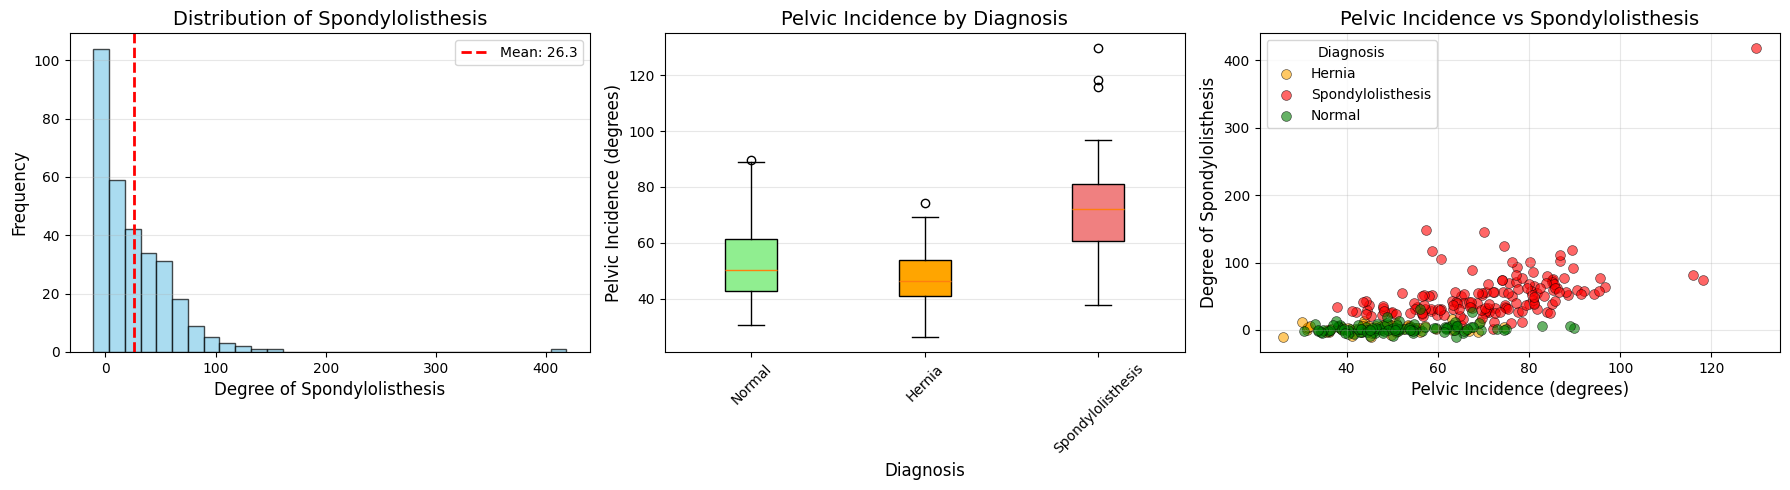

In [16]:
# ==================== QUESTION 4 ====================
print("=" * 50)
print("QUESTION 4: Matplotlib Visualization")
print("=" * 50)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ===== Plot 1 (0.5 pts): Histogram of degree_spondylolisthesis =====
axes[0].hist(patients['degree_spondylolisthesis'], bins=30,
             color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical line for mean value
mean_spondylo = patients['degree_spondylolisthesis'].mean()
axes[0].axvline(mean_spondylo, color='red', linestyle='--', linewidth=2,
                label=f'Mean: {mean_spondylo:.1f}')

axes[0].set_xlabel('Degree of Spondylolisthesis', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Spondylolisthesis', fontsize=14)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# ===== Plot 2 (0.5 pts): Box plot of pelvic_incidence by diagnosis =====
# Prepare data for box plot
diagnosis_groups = [
    patients[patients['class'] == 'Normal']['pelvic_incidence'],
    patients[patients['class'] == 'Hernia']['pelvic_incidence'],
    patients[patients['class'] == 'Spondylolisthesis']['pelvic_incidence']
]

bp = axes[1].boxplot(diagnosis_groups,
                     labels=['Normal', 'Hernia', 'Spondylolisthesis'],
                     patch_artist=True)

# Color the boxes
colors = ['lightgreen', 'orange', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes[1].set_ylabel('Pelvic Incidence (degrees)', fontsize=12)
axes[1].set_xlabel('Diagnosis', fontsize=12)
axes[1].set_title('Pelvic Incidence by Diagnosis', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# ===== Plot 3 (0.5 pts): Scatter plot =====
# Color by class
colors_map = {'Normal': 'green', 'Hernia': 'orange', 'Spondylolisthesis': 'red'}

for diagnosis in patients['class'].unique():
    diagnosis_data = patients[patients['class'] == diagnosis]
    axes[2].scatter(diagnosis_data['pelvic_incidence'],
                    diagnosis_data['degree_spondylolisthesis'],
                    c=colors_map[diagnosis],
                    label=diagnosis,
                    alpha=0.6,
                    s=50,
                    edgecolors='black',
                    linewidth=0.5)

axes[2].set_xlabel('Pelvic Incidence (degrees)', fontsize=12)
axes[2].set_ylabel('Degree of Spondylolisthesis', fontsize=12)
axes[2].set_title('Pelvic Incidence vs Spondylolisthesis', fontsize=14)
axes[2].legend(title='Diagnosis')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()

# Save figure
plt.savefig('orthopedic_analysis.png', dpi=300, bbox_inches='tight')
print("\nFigure saved as 'orthopedic_analysis.png'")

plt.show()

---
### Question 5: Pandas - Correlation & Complex Query (0.75 points)

**Task:** Analyze relationships between features and find specific patient groups.

In [17]:
# ==================== QUESTION 5 ====================
print("=" * 50)
print("QUESTION 5: Correlation & Complex Query")
print("=" * 50)

# Part A (0.4 pts): Correlation matrix
print("\n--- Part A: Correlation Analysis ---")

# Select numeric columns (excluding the z-score column we added)
numeric_cols = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
numeric_data = patients[numeric_cols]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Find highest correlation (excluding diagonal - self-correlation)
# Unstack the correlation matrix and filter out 1.0 values
corr_unstacked = correlation_matrix.unstack()
corr_filtered = corr_unstacked[corr_unstacked < 1.0]  # Remove self-correlation

# Find the strongest positive correlation
strongest_corr_idx = corr_filtered.idxmax()
strongest_corr_value = corr_filtered.max()

print(f"\nStrongest positive correlation:")
print(f"Features: {strongest_corr_idx[0]} & {strongest_corr_idx[1]}")
print(f"Correlation coefficient: {strongest_corr_value:.3f}")

QUESTION 5: Correlation & Complex Query

--- Part A: Correlation Analysis ---

Correlation Matrix:
                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                     1.000        0.629   
pelvic_tilt                          0.629        1.000   
lumbar_lordosis_angle                0.717        0.433   
sacral_slope                         0.815        0.062   
pelvic_radius                       -0.247        0.033   
degree_spondylolisthesis             0.639        0.398   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                          0.717         0.815         -0.247   
pelvic_tilt                               0.433         0.062          0.033   
lumbar_lordosis_angle                     1.000         0.598         -0.080   
sacral_slope                              0.598         1.000         -0.342   
pelvic_radius                            -0.080        -0.342          1.000   
degree_

In [18]:
# Part B (0.35 pts): Complex filtering
print("\n--- Part B: Complex Query ---")

# Find patients who meet ALL these criteria:
# - pelvic_incidence between 50 and 70 (inclusive)
# - degree_spondylolisthesis > 20
# - class is "Spondylolisthesis"

specific_patients = patients[
    (patients['pelvic_incidence'] >= 50) &
    (patients['pelvic_incidence'] <= 70) &
    (patients['degree_spondylolisthesis'] > 20) &
    (patients['class'] == 'Spondylolisthesis')
]

print(f"\nPatients matching all criteria: {len(specific_patients)}")
print(f"Percentage of total: {(len(specific_patients) / len(patients) * 100):.1f}%")

# Show sample of matching patients
if len(specific_patients) > 0:
    print("\nSample of matching patients:")
    print(specific_patients[['pelvic_incidence', 'degree_spondylolisthesis', 'class']].head())


--- Part B: Complex Query ---

Patients matching all criteria: 47
Percentage of total: 15.2%

Sample of matching patients:
    pelvic_incidence  degree_spondylolisthesis              class
69         58.599529                 28.059697  Spondylolisthesis
73         55.512212                 34.552946  Spondylolisthesis
77         58.782548                 51.584125  Spondylolisthesis
78         67.412538                 33.157646  Spondylolisthesis
86         59.785265                 22.123869  Spondylolisthesis


---
### Question 6: Pandas - Summary Report Creation (0.75 points)

**Task:** Create a comprehensive summary comparing Normal vs Abnormal patients.

In [19]:
# ==================== QUESTION 6 ====================
print("=" * 50)
print("QUESTION 6: Summary Report Creation")
print("=" * 50)

# Part a (0.25 pts): Create abnormal flag
print("\n--- Part A: Create Abnormal Flag ---")

# Create new column: True if Hernia or Spondylolisthesis, False if Normal
patients['abnormal'] = patients['class'].isin(['Hernia', 'Spondylolisthesis'])

# Alternative method:
# patients['abnormal'] = patients['class'] != 'Normal'

normal_count = (~patients['abnormal']).sum()
abnormal_count = patients['abnormal'].sum()

print(f"Normal patients: {normal_count}")
print(f"Abnormal patients: {abnormal_count}")

QUESTION 6: Summary Report Creation

--- Part A: Create Abnormal Flag ---
Normal patients: 100
Abnormal patients: 210


In [20]:
# Part b (0.5 pts): Compare Normal vs Abnormal groups
print("\n--- Part B: Normal vs Abnormal Comparison ---")

# Calculate mean of all numeric features by abnormal status
comparison = patients.groupby('abnormal').agg({
    'pelvic_incidence': 'mean',
    'pelvic_tilt': 'mean',
    'lumbar_lordosis_angle': 'mean',
    'sacral_slope': 'mean',
    'pelvic_radius': 'mean',
    'degree_spondylolisthesis': 'mean'
})

# Add patient count
comparison['patient_count'] = patients.groupby('abnormal').size()

# Rename index for clarity
comparison.index = ['Normal', 'Abnormal']

print("\nNormal vs Abnormal Comparison:")
print(comparison.round(2))

# Find which features differ most
print("\n--- Feature Difference Analysis ---")

# Calculate differences (Abnormal - Normal)
differences = comparison.loc['Abnormal'] - comparison.loc['Normal']

# Exclude patient_count from difference analysis
feature_differences = differences.drop('patient_count')

# Find feature with biggest absolute difference
biggest_diff_feature = feature_differences.abs().idxmax()
biggest_diff_value = differences[biggest_diff_feature]

print(f"\nFeature with biggest difference: {biggest_diff_feature}")
print(f"Difference (Abnormal - Normal): {biggest_diff_value:.2f}")

# Show all differences
print("\nAll feature differences (Abnormal - Normal):")
print(feature_differences.round(2))


--- Part B: Normal vs Abnormal Comparison ---

Normal vs Abnormal Comparison:
          pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
Normal               51.69        12.82                  43.54         38.86   
Abnormal             64.69        19.79                  55.93         44.90   

          pelvic_radius  degree_spondylolisthesis  patient_count  
Normal           123.89                      2.19            100  
Abnormal         115.08                     37.78            210  

--- Feature Difference Analysis ---

Feature with biggest difference: degree_spondylolisthesis
Difference (Abnormal - Normal): 35.59

All feature differences (Abnormal - Normal):
pelvic_incidence            13.01
pelvic_tilt                  6.97
lumbar_lordosis_angle       12.38
sacral_slope                 6.04
pelvic_radius               -8.81
degree_spondylolisthesis    35.59
dtype: float64
